## Teleco Customer Churn

In [211]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [212]:
df = pd.read_csv("C:/Users/chilesh/Desktop/Data science/project 3/Telco-Customer-Churn.csv")

In [213]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [215]:
df.shape

(7043, 21)

In [216]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [217]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [218]:
## Checking for missing values

df.isnull().sum().sort_values(ascending = False)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [219]:
df.select_dtypes(include = 'int').head()

,SeniorCitizen,tenure
0,0,1
1,0,34
2,0,2
3,0,45
4,0,2


In [220]:
df.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [221]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [222]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [223]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [224]:
df.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [225]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [226]:
df.PaperlessBilling.value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [227]:
df.MonthlyCharges.value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
101.70     1
48.40      1
108.35     1
72.00      1
Name: count, Length: 1585, dtype: int64

In [228]:
df.TotalCharges.value_counts()

TotalCharges
20.2      11
          11
19.75      9
19.65      8
19.9       8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
108.15     1
Name: count, Length: 6531, dtype: int64

In [229]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [230]:
df.select_dtypes(include = 'object').head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


## Plotting 

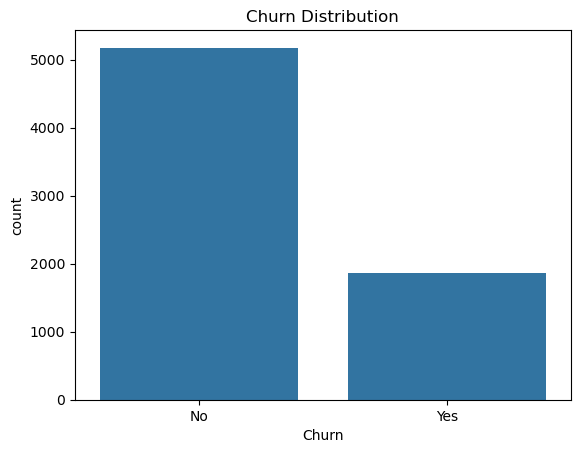

In [231]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


In [232]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [233]:
gen_churn = df.groupby('gender')['Churn'].value_counts()


In [234]:
gen_churn = gen_churn.unstack()
gen_churn

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


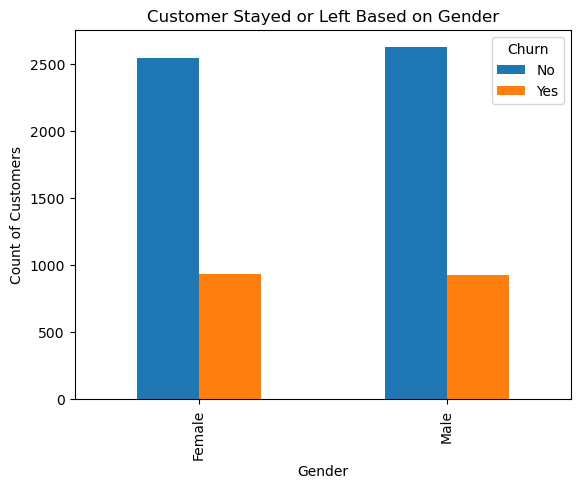

In [235]:
gen_churn.plot(kind='bar')
plt.title('Customer Stayed or Left Based on Gender')
plt.ylabel('Count of Customers')
plt.xlabel('Gender')
plt.show()


In [236]:
partner_gen_churn = df.groupby(['Partner','gender'])['Churn'].value_counts()


In [237]:
partner_gen_churn=partner_gen_churn.unstack()
partner_gen_churn

Churn             No  Yes
Partner gender           
No      Female  1180  620
        Male    1261  580
Yes     Female  1369  319
        Male    1364  350

Text(0.5, 1.0, 'Destribution of partner and gender churn')

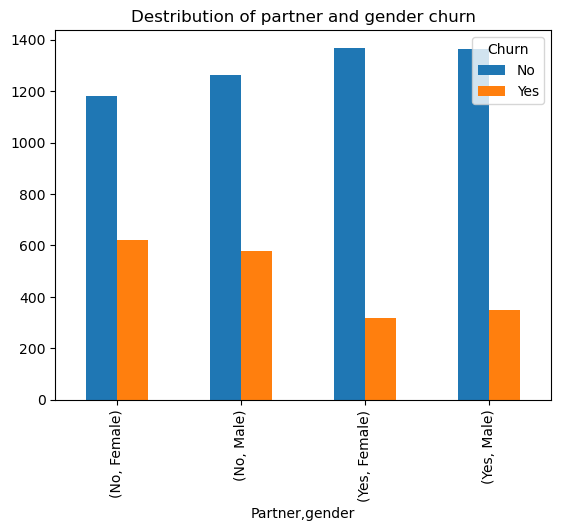

In [238]:
partner_gen_churn.plot(kind ='bar')
plt.title('Destribution of partner and gender churn')

In [239]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

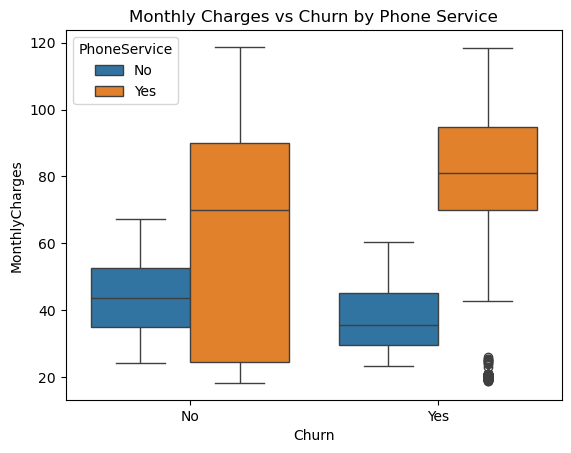

In [240]:
import seaborn as sns

sns.boxplot(
    x='Churn',
    y='MonthlyCharges',
    hue='PhoneService',
    data=df
)
plt.title('Monthly Charges vs Churn by Phone Service')
plt.show()


C:\Users\chilesh\AppData\Local\Temp\ipykernel_26044\3078087395.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['PhoneService','ChargesGroup'])['Churn'].value_counts().unstack()


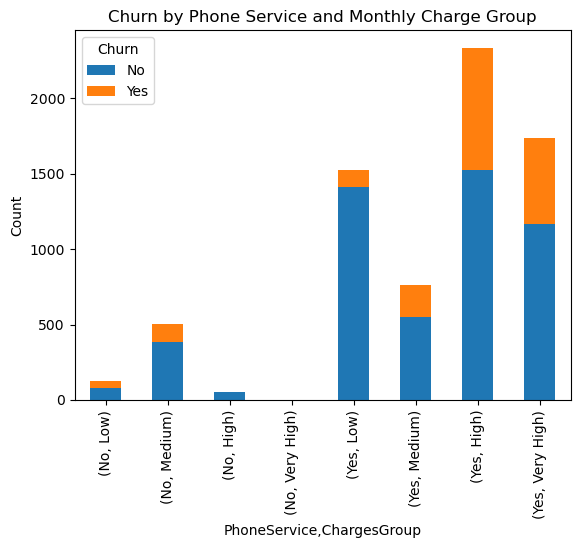

In [241]:
df['ChargesGroup'] = pd.cut(
    df['MonthlyCharges'],
    bins=[0, 30, 60, 90, 120],
    labels=['Low', 'Medium', 'High', 'Very High']
)

grouped = df.groupby(['PhoneService','ChargesGroup'])['Churn'].value_counts().unstack()

grouped.plot(kind='bar', stacked=True)
plt.title('Churn by Phone Service and Monthly Charge Group')
plt.ylabel('Count')
plt.show()


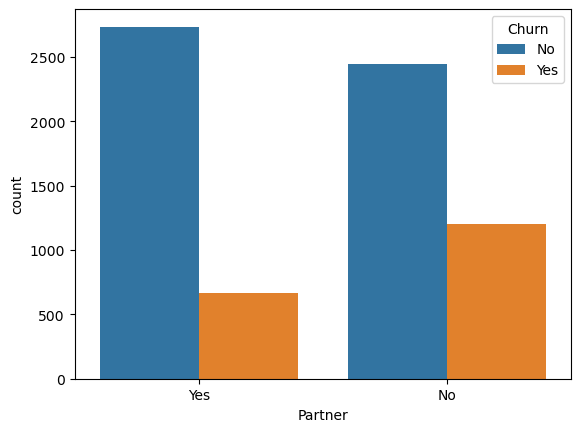

In [242]:
## Plot Partner vs churn
sns.countplot(x ='Partner',hue = 'Churn',data= df)
plt.show()

In [243]:
cont_char = df.groupby('Contract')['Churn'].value_counts().unstack()

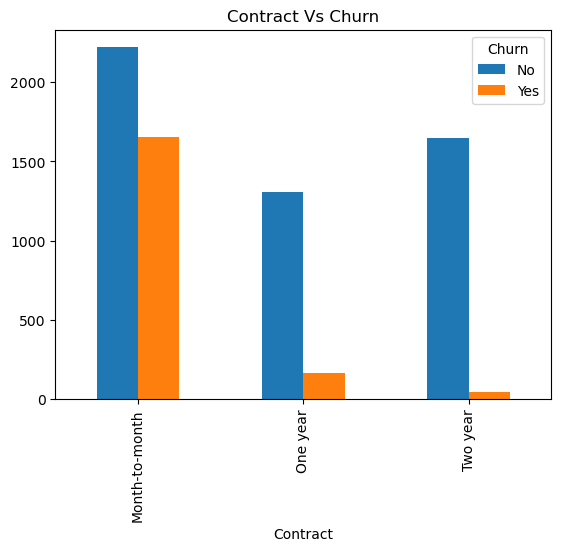

In [244]:
cont_char.plot(kind = 'bar')
plt.title('Contract Vs Churn')
plt.show()

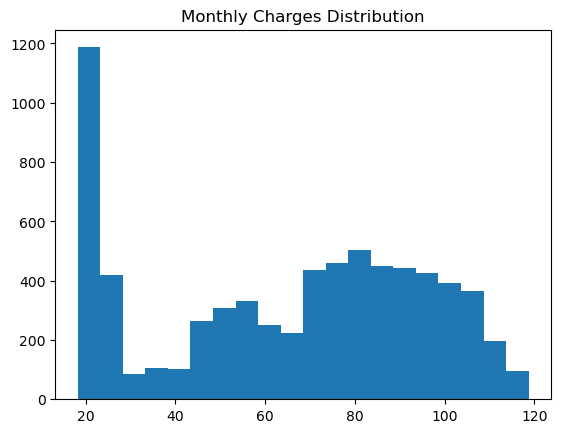

In [245]:
plt.hist(df['MonthlyCharges'], bins=20)
plt.title('Monthly Charges Distribution')
plt.show()


In [246]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'ChargesGroup'],
      dtype='object')

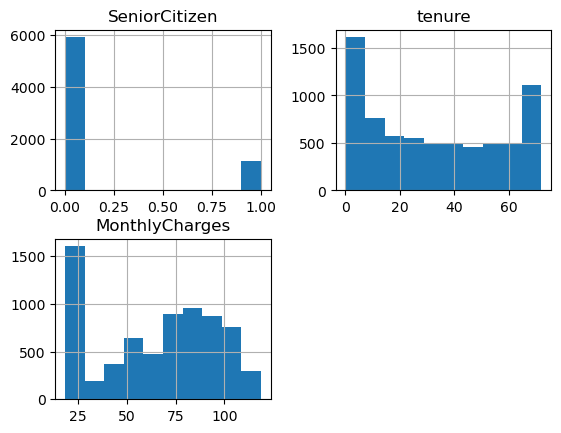

In [247]:
df.hist()
plt.show()

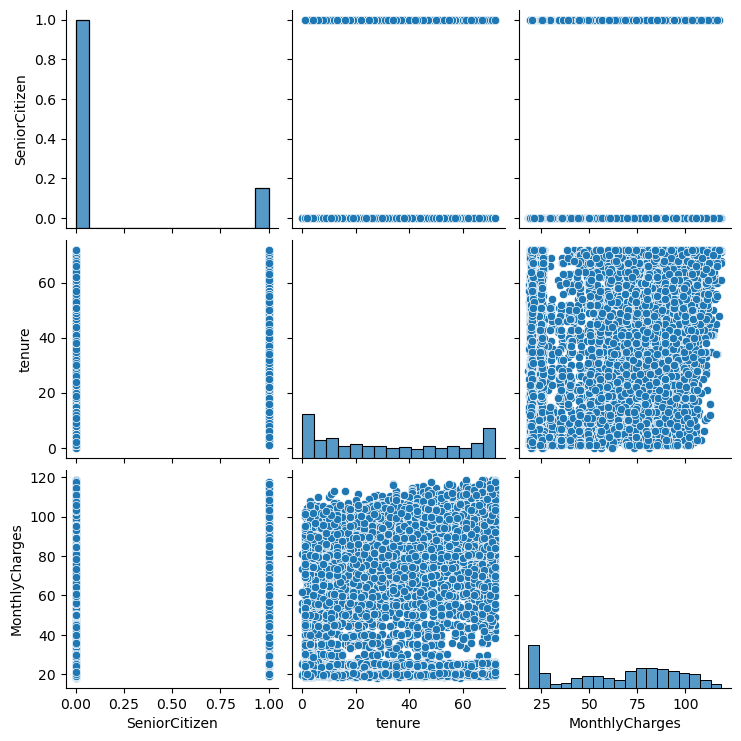

In [248]:
sns.pairplot(df)
plt.show()


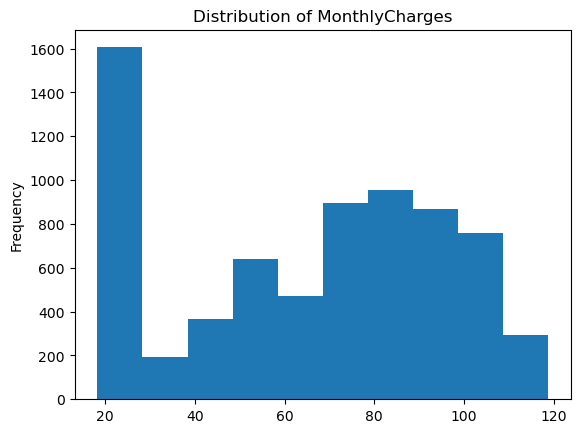

In [249]:
df['MonthlyCharges'].plot(kind =  'hist')
plt.title("Distribution of MonthlyCharges")
plt.show()

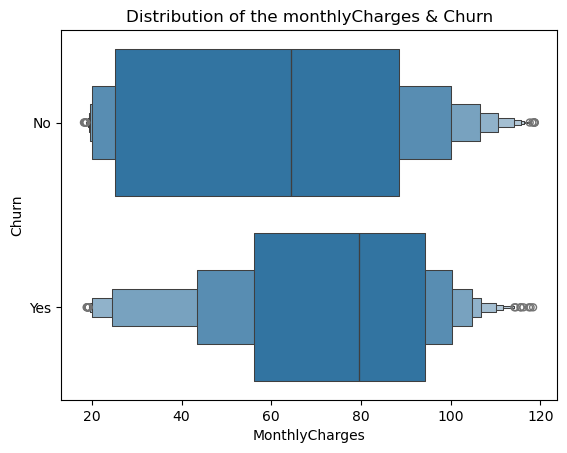

In [250]:
sns.boxenplot(x = 'MonthlyCharges',y='Churn',data= df)
plt.title('Distribution of the monthlyCharges & Churn')
plt.show()

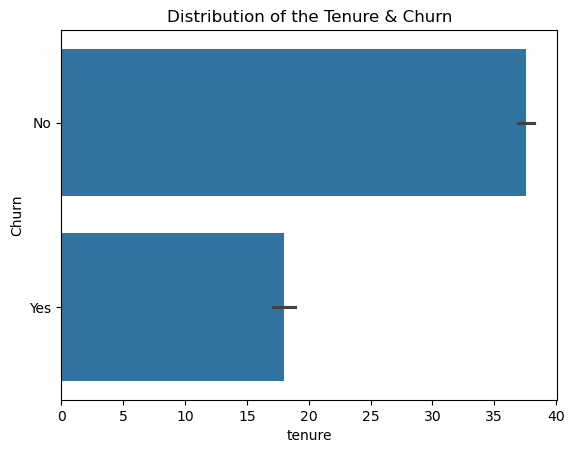

In [251]:
sns.barplot(x ='tenure',y='Churn',data= df)
plt.title('Distribution of the Tenure & Churn')
plt.show()

In [252]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'ChargesGroup'],
      dtype='object')

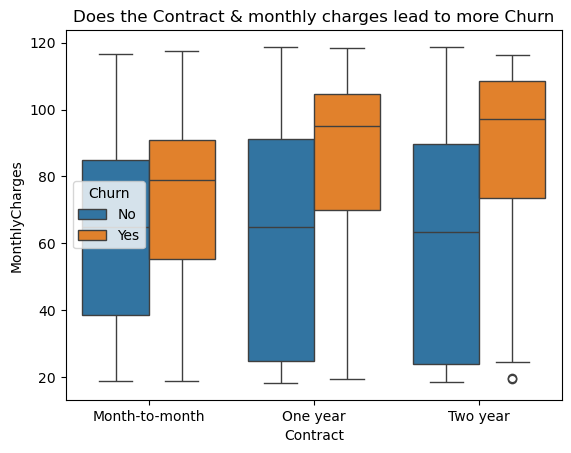

In [253]:
sns.boxplot(x='Contract',y='MonthlyCharges',hue = 'Churn',data=df)
plt.title('Does the Contract & monthly charges lead to more Churn')
plt.show()

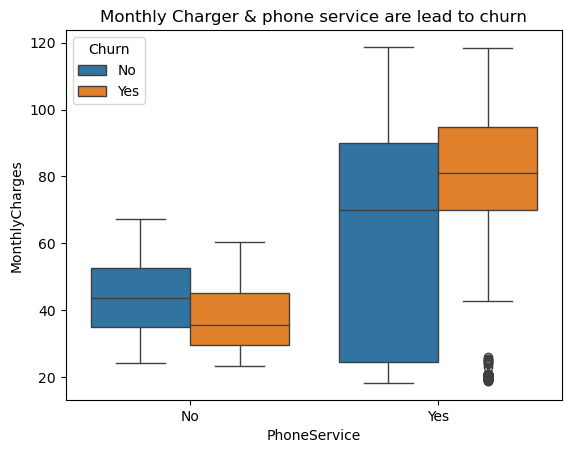

In [254]:
sns.boxplot(x='PhoneService',y='MonthlyCharges',hue = 'Churn',data=df)
plt.title('Monthly Charger & phone service are lead to churn')
plt.show()

In [255]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [256]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
ChargesGroup         0
dtype: int64

In [257]:
df['TotalCharges'].value_counts().head(15)

TotalCharges
20.20    11
19.75     9
19.90     8
19.65     8
20.05     8
19.55     7
45.30     7
20.25     6
20.15     6
19.45     6
20.30     5
20.45     5
69.95     4
74.70     4
20.50     4
Name: count, dtype: int64

In [258]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mode()[0])

In [259]:
df = df.drop('customerID',axis=1 )

In [260]:
df.select_dtypes(include= int)

,SeniorCitizen,tenure
0,0,1
1,0,34
2,0,2
3,0,45
4,0,2
...,...,...
7038,0,24
7039,0,72
7040,0,11
7041,1,4


In [261]:
core = df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].corr()

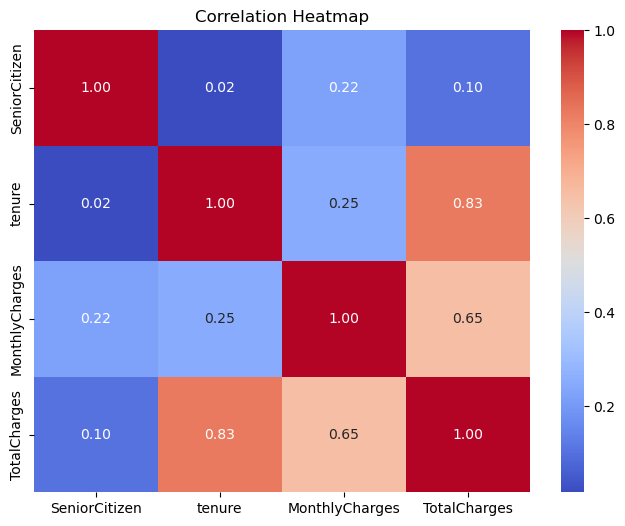

In [262]:
plt.figure(figsize=(8,6))
sns.heatmap(core, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [263]:
df['IsNewCustomer'] = (df['tenure'] <= 12).astype(int)
df['HasInternetService'] = (df['InternetService'] != 'No').astype(int)
service_cols = [
    'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

df['ServiceCount'] = (df[service_cols] == 'Yes').sum(axis=1)
df['HighMonthlyCharge'] = (df['MonthlyCharges'] > df['MonthlyCharges'].median()).astype(int)

df['AutoPayment'] = df['PaymentMethod'].isin(
    ['Bank transfer (automatic)', 'Credit card (automatic)']
).astype(int)

df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1yr', '1-2yr', '2-4yr', '4-6yr']
)


# Encoding

In [264]:
dd = df.copy()

In [265]:
dd.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,ChargesGroup,IsNewCustomer,HasInternetService,ServiceCount,HighMonthlyCharge,AutoPayment,TenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,29.85,29.85,No,Low,1,1,1,0,0,0-1yr
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,56.95,1889.50,No,Medium,0,1,2,0,0,2-4yr
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,53.85,108.15,Yes,Medium,1,1,2,0,0,0-1yr
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,42.30,1840.75,No,Medium,0,1,3,0,1,2-4yr
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,70.70,151.65,Yes,High,1,1,0,1,0,0-1yr


In [266]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   gender              7043 non-null   object  
 1   SeniorCitizen       7043 non-null   int64   
 2   Partner             7043 non-null   object  
 3   Dependents          7043 non-null   object  
 4   tenure              7043 non-null   int64   
 5   PhoneService        7043 non-null   object  
 6   MultipleLines       7043 non-null   object  
 7   InternetService     7043 non-null   object  
 8   OnlineSecurity      7043 non-null   object  
 9   OnlineBackup        7043 non-null   object  
 10  DeviceProtection    7043 non-null   object  
 11  TechSupport         7043 non-null   object  
 12  StreamingTV         7043 non-null   object  
 13  StreamingMovies     7043 non-null   object  
 14  Contract            7043 non-null   object  
 15  PaperlessBilling    7043 non-null   ob

In [267]:
dd.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
ChargesGroup           0
IsNewCustomer          0
HasInternetService     0
ServiceCount           0
HighMonthlyCharge      0
AutoPayment            0
TenureGroup           11
dtype: int64

In [272]:

dd['TenureGroup'] = dd['TenureGroup'].fillna(dd['TenureGroup'].mode()[0])

In [273]:
dd.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
ChargesGroup          0
IsNewCustomer         0
HasInternetService    0
ServiceCount          0
HighMonthlyCharge     0
AutoPayment           0
TenureGroup           0
dtype: int64

In [277]:
x= dd.drop(columns='Churn',axis=1)
y=dd['Churn']

In [288]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
y = encoder.fit_transform(y)
print(y)
y.shape


[0 0 1 ... 0 1 0]


(7043,)

In [286]:
x = pd.get_dummies(df)

x.isnull().sum()
x.info()
x.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   IsNewCustomer                            7043 non-null   int64  
 5   HasInternetService                       7043 non-null   int64  
 6   ServiceCount                             7043 non-null   int64  
 7   HighMonthlyCharge                        7043 non-null   int64  
 8   AutoPayment                              7043 non-null   int64  
 9   gender_Female                            7043 non-null   bool   
 10  gender_Male                              7043 no

(7043, 60)

## Modelbuilding

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [290]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [293]:
lr_reg = LogisticRegression(max_iter=1000)
lr_reg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [294]:
ran_for = RandomForestClassifier(n_estimators=200,
                                 random_state=42
                                 )
ran_for.fit(x_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [295]:
sgd = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
sgd.fit(x_train, y_train)


,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [296]:
from sklearn.metrics import classification_report, confusion_matrix


def evaluate(model, x_test, y_test, name):
    y_pred = model.predict(x_test)
    print(f"\n{name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [297]:
evaluate(lr_reg,x_test,y_test,"Logistic Regression")
evaluate(ran_for,x_test,y_test,"RandomForestClassifier")
evaluate(sgd,x_test,y_test, "SGD  Classifier")



Logistic Regression
[[1036    0]
 [   0  373]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


RandomForestClassifier
[[1036    0]
 [   0  373]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


SGD  Classifier
[[832 204]
 [ 84 289]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1036
           1       0.59      0.77      0.67       373

    accuracy                           0.80

In [299]:
y_prob = lr_reg.predict_proba(x_test)[:, 1]
y_prob

array([9.98100604e-01, 7.46303635e-04, 2.50530476e-04, ...,
       5.40118158e-04, 5.18705492e-04, 9.97200507e-01])

In [300]:
threshold = 0.35
y_pred_custom = (y_prob >= threshold).astype(int)

In [301]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[[1036    0]
 [   0  373]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

